# Dimensionality Reduction in Linear Regression

In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

## Partial Least Squares Regression

We call this method partial least squares regression, or "PLSR". As in PCA, PLSR is iterative. It first tries to find the vector within the  nn -dimensional space of  XX  with the highest covariance with  yy . Then it looks for a second vector, perpendicular to the first, that explains the highest covariance with  yy  that remains after accounting for the first vector. This continues for as many components as we permit, up to  nn .

SciKit-learn has a function to run PLSR:

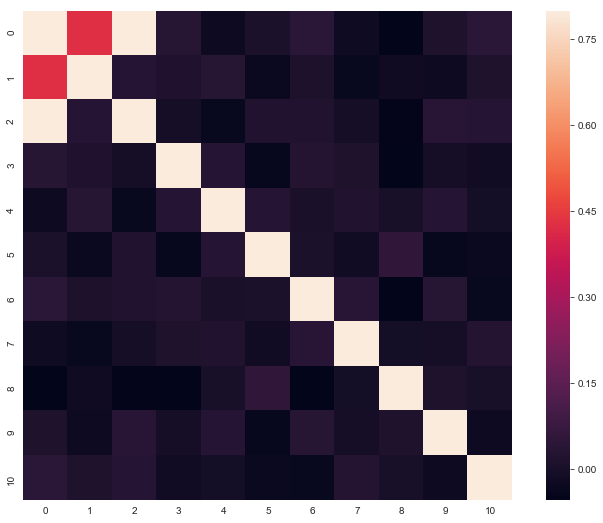

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8379817318680611
R-squared PLSR: 0.8379814341477496


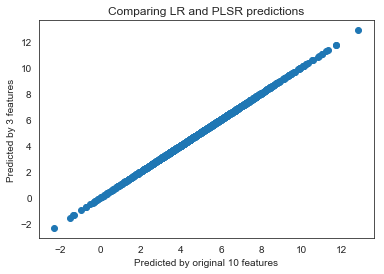

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

## Model testing

PLSR will not work as well if features are uncorrelated, or if the only feature correlations are paired (feature 1 is only correlated with feature 2, feature 3 is only correlated with feature 4, etc).

The trick to successful PLSR is to select the right number of components to keep. Use the cell below to create new partial least square regressions with different numbers of components, then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression. Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

Since this data is randomly generated, you can also play with it by changing how  yy  is computed, then observing how different relationships between  yy  and  XX  play out in PLSR.

### Test 1 - Number of components

#### 4 Components

R-squared regression: 0.8379817318680611
R-squared PLSR: 0.8379817306448237


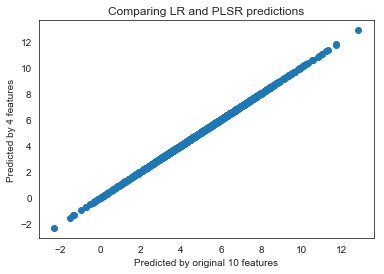

In [4]:
# print original regression value
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 4 dimensions.
pls4 = PLSRegression(n_components=4)

# Reduce X to R(X) and regress on y.
pls4.fit(X, y)

# Save predicted values.
Y_PLS_pred_4 = pls4.predict(X)
print('R-squared PLSR:', pls4.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred_4) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 4 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

#### 2 Components

R-squared regression: 0.8379817318680611
R-squared PLSR: 0.8379392985935215


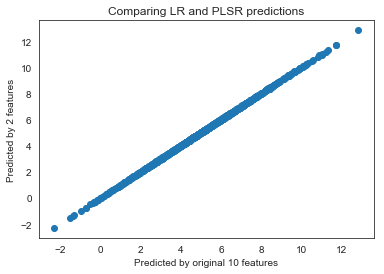

In [5]:
# print original regression value
print('R-squared regression:', regr.score(X, y))

# Reduce feature space to 2 dimensions.
pls2 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred_2 = pls2.predict(X)
print('R-squared PLSR:', pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred_2) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

#### 7 Components

R-squared regression: 0.8379817318680611
R-squared PLSR: 0.8379817318680611


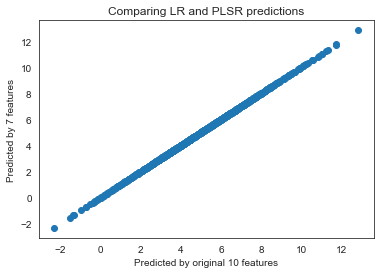

In [6]:
# print original regression value
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls7 = PLSRegression(n_components=7)

# Reduce X to R(X) and regress on y.
pls7.fit(X, y)

# Save predicted values.
Y_PLS_pred_7 = pls7.predict(X)
print('R-squared PLSR:', pls7.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred_7) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 7 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

The PLSR is more accurate with more components. This accuracy is likely due to the fact that the features have little correlation to one another, so the PLSR fails to reduce the dimensionality of the model. 

### Test 2 - changing y and seeing results on X

#### High correlation

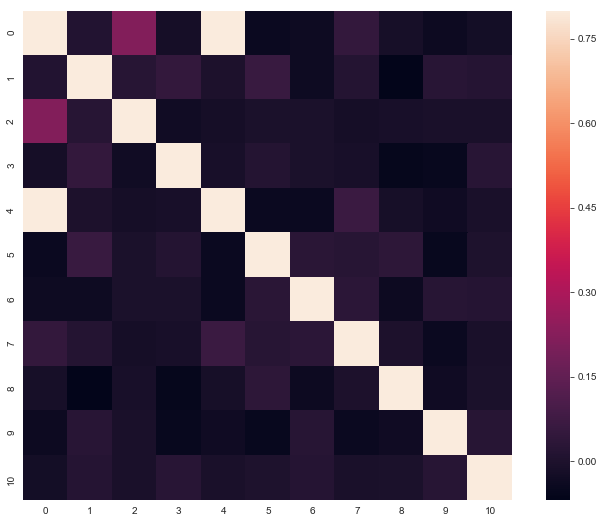

In [7]:
# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))
# Create new normally distributed outcome related to parameters but with noise.
yy = X[:, 1] + 4 * X[:, 3] + np.random.normal(size=n * 1) + 7

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, yy, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.9499046492365307
R-squared PLSR: 0.9499045346957935


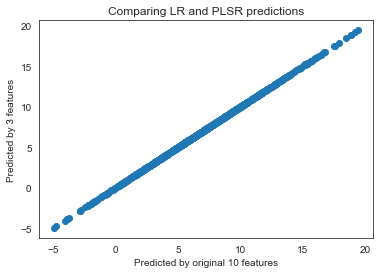

In [8]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, yy)

# Save predicted values.
Y_pred_yy = regr.predict(X)
print('R-squared regression:', regr.score(X, yy))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls_yy = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on yy.
pls_yy.fit(X, yy)

# Save predicted values.
Y_PLS_pred_yy = pls_yy.predict(X)
print('R-squared PLSR:', pls_yy.score(X, yy))

# Compare the predictions of the two models
plt.scatter(Y_pred_yy,Y_PLS_pred_yy) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Changing y to yy increased correlation among the features of the data. As such, both regression tests had higher R squared values. The line plot above shows that the PLSR works well on data with higher levels of correlation. 

#### Low correlation

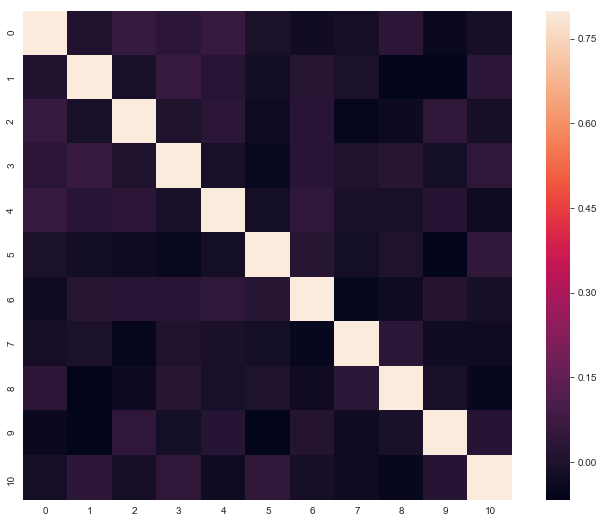

In [9]:
# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))
# Create new normally distributed outcome related to parameters but with noise.
yyy = X[:, 0]* X[:, 1] + np.random.normal(size=n * 1) +4

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, yyy, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.011969553040986902
R-squared PLSR: 0.011969551928684541


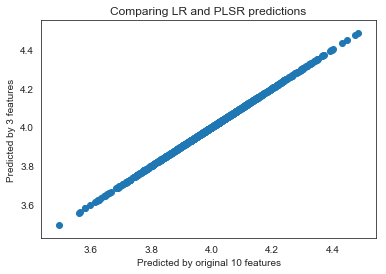

In [10]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, yyy)

# Save predicted values.
Y_pred_yyy = regr.predict(X)
print('R-squared regression:', regr.score(X, yyy))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls_yyy = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on yy.
pls_yyy.fit(X, yyy)

# Save predicted values.
Y_PLS_pred_yyy = pls_yyy.predict(X)
print('R-squared PLSR:', pls_yyy.score(X, yyy))

# Compare the predictions of the two models
plt.scatter(Y_pred_yyy,Y_PLS_pred_yyy) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Both regression tests show a low R-squared value due to low levels of correlation among the features. However, the PLSR still mathces well with a regular regression model.  